In [44]:
from os.path import join
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

sns.set()

**Please download:**

- `figures/clustering/` folder
- `data/data_preprocessed.csv` file

## **Import preprocessed data**

In [45]:
df = pd.read_csv(join('..', 'data', 'data_preprocessed.csv'))

In [46]:
df.head()

,age,income,frq,rcn,mnt,clothes,kitchen,small_appliances,toys,house_keeping,...,oh_status_Widow,oh_gender_M,oh_dependents_1.0,oh_description_Kind of OK,oh_description_Meh...,oh_description_OK nice!,oh_description_Take my money!!,PC0,PC1,PC2
0,78,0.743162,1.191605,0.457819,1402,-0.617023,-0.243065,1.216847,0.495837,-0.499274,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.896356,-1.937697,1.120781
1,88,1.559488,1.100011,-1.535723,1537,0.166160,-0.790228,0.740464,-0.374374,-0.631907,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.981092,-1.421498,0.785625
2,34,-1.548542,-0.823463,0.557496,44,-0.834573,1.672006,-0.371096,-0.809480,2.286023,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,-2.813108,0.381440,-0.780867
3,69,0.845528,0.550447,-1.402820,888,0.383710,0.440889,-0.768082,-0.084304,-0.234007,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.247013,-0.514177,-1.302203
4,69,0.782435,1.008417,-0.871209,1138,0.340200,-0.243065,-0.053508,-0.374374,-0.366640,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.781920,-0.704805,-0.443376


In [47]:
df.columns

Index(['age', 'income', 'frq', 'rcn', 'mnt', 'clothes', 'kitchen',
       'small_appliances', 'toys', 'house_keeping', 'dependents',
       'per_net_purchase', 'gender', 'education', 'status', 'description',
       'birth_year', 'spent_online', 'oh_education_2nd Cycle',
       'oh_education_Graduation', 'oh_education_Master', 'oh_education_PhD',
       'oh_status_Married', 'oh_status_Single', 'oh_status_Together',
       'oh_status_Widow', 'oh_gender_M', 'oh_dependents_1.0',
       'oh_description_Kind of OK', 'oh_description_Meh...',
       'oh_description_OK nice!', 'oh_description_Take my money!!', 'PC0',
       'PC1', 'PC2'],
      dtype='object')

In [48]:
# Splitting feature names into groups
# Remember which metric_features we decided to keep?
metric_features = ['income',
 'frq',
 'rcn',
 'clothes',
 'kitchen',
 'small_appliances',
 'toys',
 'house_keeping',
 'per_net_purchase',
 'spent_online']

non_metric_features = df.columns[df.columns.str.startswith('oh_')].tolist()
pc_features = df.columns[df.columns.str.startswith('PC')].tolist()

unused_features = [i for i in df.columns if i not in (metric_features+non_metric_features+pc_features) ]

In [49]:
print('metric_features:', metric_features)
print('non_metric_features:', non_metric_features)
print('unused_features:', unused_features)
print('pc_features:', pc_features)


metric_features: ['income', 'frq', 'rcn', 'clothes', 'kitchen', 'small_appliances', 'toys', 'house_keeping', 'per_net_purchase', 'spent_online']
non_metric_features: ['oh_education_2nd Cycle', 'oh_education_Graduation', 'oh_education_Master', 'oh_education_PhD', 'oh_status_Married', 'oh_status_Single', 'oh_status_Together', 'oh_status_Widow', 'oh_gender_M', 'oh_dependents_1.0', 'oh_description_Kind of OK', 'oh_description_Meh...', 'oh_description_OK nice!', 'oh_description_Take my money!!']
unused_features: ['age', 'mnt', 'dependents', 'gender', 'education', 'status', 'description', 'birth_year']
pc_features: ['PC0', 'PC1', 'PC2']


# **Hierarchical Clustering**

What is hierarchical clustering? 

How does it work? 

How does it relate to the distance matrix we discussed at the beginning of the course? ;)





![](../figures/clustering/hierarch.gif)

(From https://dashee87.github.io/data%20science/general/Clustering-with-Scikit-with-GIFs/)


### **The distance matrix**

![](../figures/clustering/hc_distance_matrix.png)

<div class="alert alert-block alert-info" style="font-size:26px">

> É apenas como algortimo funciona! [Pontos a) $\rightarrow$ Distâncias d)]

</div>

### **Different types of linkage**

<img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_linkage_comparison_001.png" width="50%">

### **How are they computed?**

<img src="../figures/clustering/linkage_types.jpeg" width="30%" align="center">

<br>

**Ward linkage**: minimizes the sum of squared differences within all clusters. It is a variance-minimizing approach and in this sense is similar to the k-means objective function but tackled with an agglomerative hierarchical approach.


### **Characteristics:**

- *bottom up approach*: each observation starts in its own cluster, and clusters are successively merged together
- *greedy/local algorithm*: at each iteration tries to minimize the distance of cluster merging
- *no realocation*: after an observation is assigned to a cluster, it can no longer change
- *deterministic*: you always get the same answer when you run it
- *scalability*: can become *very slow* for a large number of observations

### **How to apply Hierarchical Clustering?**

**Note: Which types of variables should be used for clustering?**

In [50]:
# Performing HC
hclust = AgglomerativeClustering(linkage='ward', 
                                 metric='euclidean', 
                                 n_clusters=5)
hc_labels = hclust.fit_predict(df[metric_features])
hc_labels

array([0, 0, 1, ..., 1, 2, 2], dtype=int64)

In [51]:
# Characterizing the clusters
labels_series = pd.Series(hc_labels, 
                          name='labels', 
                          index=df.index # WHY df.index ?? -> to keep the same index as the original df
                          ) 

df_concat = pd.concat(
    [df, labels_series],
    axis=1)

df_concat[metric_features+['labels']].groupby('labels').mean()

,income,frq,rcn,clothes,kitchen,small_appliances,toys,house_keeping,per_net_purchase,spent_online
labels,,,,,,,,,,
0,1.127360,1.054164,-0.086791,-0.565696,0.231780,0.639929,0.310619,0.148892,-1.352162,0.235598
1,-0.816389,-0.843022,0.084738,-0.190329,-0.130035,0.479371,-0.044491,-0.051491,0.645503,-0.753319
2,0.583921,0.696600,0.028464,0.512591,-0.310472,-0.414163,-0.309056,-0.288473,-0.184634,1.123735
3,-1.286292,-0.877714,0.170377,-1.464165,1.742958,-0.037862,1.366213,1.588910,0.813227,-0.816724
4,-0.141469,-0.441731,-0.195457,1.235357,-0.700710,-1.054846,-0.723419,-0.668869,0.418864,-0.230577


<div class="alert alert-block alert-warning" style="font-size:16px">

Ela quer que caracterizemos os clusters no projeto

- (p.e., neste caso o **Cluster 0** são os clientes com mais *income*)
- (p.e., no **Cluster 3** são os que compram mais cenas de cozinha)
- (p.e., no **Cluster 2** são os que compram online)

> Isto serve para otimizar a estratégia para estes clientes $\rightarrow$ **cada um tem os seus behaviors**

</div>

### **Defining the linkage method to choose:**

**We need to understand the following:**

---

$$SS_{t} = \sum\limits_{i = 1}^n {{{({x_i} - \overline x )}^2}} \rightarrow \bf{TOTAL} $$

$$SS_{w} = \sum\limits_{k = 1}^K {\sum\limits_{i = 1}^{{n_k}} {{{({x_i} - {{\overline x }_k})}^2}} } \rightarrow \bf{WITHIN} \text{ queremos que seja pequena a distância entre elementos do mesmo cluster } $$

$$SS_{b} = \sum\limits_{k = 1}^K {{n_k}{{({{\overline x }_k} - \overline x )}^2}} \rightarrow \bf{BETWEEN} \text{ queremos que a distância entre clusters seja grande }$$

---

$$SS_{t} = SS_{w} + SS_{b}$$

---

where 

$n$ is the total number of observations, 

$x_i$ is the vector of the $i^{th}$ observation, 

$\overline x$ is the centroid of the data, 

$K$  is the number of clusters, 

$n_k$ is the number of observations in the $k^{th}$ cluster,

and $\overline x_k$ is the centroid of the $k^{th}$ cluster.

---

![](../figures/clustering/ss_figure.png)

#### **Exercise:**

Calculate the `SS_` values using Pandas / NumPy:

*Hint: Using numpy*

$x_i$ : `X = data.values`

$\overline{x}$ : `X.mean()`

$\overline{x}_k$ : `X[hc_labels==k].mean()`

$n_k$ : `X[hc_labels==k].shape[0]`



In [52]:
# NUMPY solution:

# x_i       : X = df.values     : data
# x_bar     : X.mean(axis=0)    : centroid of data
# x_k       : X[hc_labels==k]   : points of cluster k
# x_bar_k   : X_k.mean(axis=0)  : centroid of cluster k
# n_k       : X_k.shape[0]

X = df[metric_features].values

# Computing SST
sst = np.sum(np.square(X - X.mean(axis=0)), axis=0)

# Computing SSW
ssw_iter = []                   # Outer summation
for i in np.unique(hc_labels):  # Loop for inner summation
    X_k = X[hc_labels == i]     # Data points belonging to cluster k
    inner_sum = np.sum(np.square(X_k - X_k.mean(axis=0)), axis=0)
    ssw_iter.append(inner_sum)  
ssw = np.sum(ssw_iter, axis=0)  # Outer summation

# Computing SSB
ssb_iter = []
for i in np.unique(hc_labels):  # Loop for summation
    X_k = X[hc_labels == i]     # Data points belonging to cluster k
    ssb_iter.append(X_k.shape[0] * np.square(X_k.mean(axis=0) - X.mean(axis=0)))

ssb = np.sum(ssb_iter, axis=0)

# Verifying the formula
np.round(sst) == np.round((ssw + ssb))

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [53]:
sst, ssw, ssb

(array([8817., 8817., 8817., 8817., 8817., 8817., 8817., 8817., 8817.,
        8817.]),
 array([2551.6519836 , 2958.62742011, 8705.67235429, 3583.97705377,
        5111.45331183, 5588.78848478, 6062.17766991, 5747.27135043,
        3494.25884177, 3830.40554748]),
 array([6265.3480164 , 5858.37257989,  111.32764571, 5233.02294623,
        3705.54668817, 3228.21151522, 2754.82233009, 3069.72864957,
        5322.74115823, 4986.59445252]))

Calculate the `SS_` values using Pandas / NumPy:

**Now do it using pandas**

*Hint:*

$x_i$ : `data`

$\overline{x}$ : `data.mean()`

$\overline{x}_k$ : `data.loc[data['labels']==k].mean()`

$n_k$ : `data.loc[data['labels']==k].shape[0]`



In [54]:
# $x_i$ : `data`
# $\overline{x}$ : `data.mean()`
# $\overline{x}_k$ : `data.loc[data['labels']==k].mean()`
# $n_k$ : `data.loc[data['labels']==k].shape[0]`

# SSt (with Pandas and not Numpy)
sst = np.sum((df[metric_features] - df[metric_features].mean())**2, axis=0)
sst

income              8817.0
frq                 8817.0
rcn                 8817.0
clothes             8817.0
kitchen             8817.0
small_appliances    8817.0
toys                8817.0
house_keeping       8817.0
per_net_purchase    8817.0
spent_online        8817.0
dtype: float64

In [56]:
# SSb (with Pandas and not Numpy)
df_concat = pd.concat([df, pd.Series(hc_labels, name='labels', index=df.index)], axis=1)
ssb_iter = []
for i in np.unique(hc_labels):
    X_k = df_concat.loc[df_concat['labels'] == i, metric_features]
    ssb_iter.append(X_k.shape[0] * np.square(X_k.mean() - df_concat[metric_features].mean()))
ssb = np.sum(ssb_iter, axis=0)
ssb

array([6265.3480164 , 5858.37257989,  111.32764571, 5233.02294623,
       3705.54668817, 3228.21151522, 2754.82233009, 3069.72864957,
       5322.74115823, 4986.59445252])

In [57]:
# SSw (with Pandas and not Numpy)
ssw = sst - ssb

In [58]:
ssw

income              2551.651984
frq                 2958.627420
rcn                 8705.672354
clothes             3583.977054
kitchen             5111.453312
small_appliances    5588.788485
toys                6062.177670
house_keeping       5747.271350
per_net_purchase    3494.258842
spent_online        3830.405547
dtype: float64

In [60]:
# Verifying the formula
np.round(sst) == np.round((ssw + ssb))

income              True
frq                 True
rcn                 True
clothes             True
kitchen             True
small_appliances    True
toys                True
house_keeping       True
per_net_purchase    True
spent_online        True
dtype: bool

#### **Let's wrap them into functions**

In [13]:
# Let's wrap them into functions

def get_ss(df, feats):
    """
    Calculate the sum of squares (SS) for the given DataFrame.

    The sum of squares is computed as the sum of the variances of each column
    multiplied by the number of non-NA/null observations minus one.

    Parameters:
    df (pandas.DataFrame): The input DataFrame for which the sum of squares is to be calculated.
    feats (list of str): A list of feature column names to be used in the calculation.

    Returns:
    float: The sum of squares of the DataFrame.
    """
    df_ = df[feats]
    ss = np.sum(df_.var() * (df_.count() - 1))
    
    return ss 


def get_ssb(df, feats, label_col):
    """
    Calculate the between-group sum of squares (SSB) for the given DataFrame.
    The between-group sum of squares is computed as the sum of the squared differences
    between the mean of each group and the overall mean, weighted by the number of observations
    in each group.

    Parameters:
    df (pandas.DataFrame): The input DataFrame containing the data.
    feats (list of str): A list of feature column names to be used in the calculation.
    label_col (str): The name of the column in the DataFrame that contains the group labels.
    
    Returns
    float: The between-group sum of squares of the DataFrame.
    """
    
    ssb_i = 0
    for i in np.unique(df[label_col]):
        df_ = df.loc[:, feats]
        X_ = df_.values
        X_k = df_.loc[df[label_col] == i].values
        
        ssb_i += (X_k.shape[0] * (np.square(X_k.mean(axis=0) - X_.mean(axis=0))) )

    ssb = np.sum(ssb_i)
    

    return ssb


def get_ssw(df, feats, label_col):
    """
    Calculate the sum of squared within-cluster distances (SSW) for a given DataFrame.

    Parameters:
    df (pandas.DataFrame): The input DataFrame containing the data.
    feats (list of str): A list of feature column names to be used in the calculation.
    label_col (str): The name of the column containing cluster labels.

    Returns:
    float: The sum of squared within-cluster distances (SSW).
    """
    feats_label = feats+[label_col]

    df_k = df[feats_label].groupby(by=label_col).apply(lambda col: get_ss(col, feats), 
                                                       include_groups=False)

    return df_k.sum()



In [14]:
df_sst_ = get_ss(df_concat, metric_features)
df_ssb_ = get_ssb(df_concat, metric_features, 'labels')
df_ssw_ = get_ssw(df_concat, metric_features, 'labels')

print("SSb:  ", df_ssb_)
print("SSw:  ", df_ssw_)
print("SSt:  ", df_sst_)
print("SSt == SSb+SSw ? ", (df_sst_ == df_ssb_ + df_ssw_))

SSb:   40535.715982027425
SSw:   47634.284017972604
SSt:   88170.0000000003
SSt == SSb+SSw ?  False


#### $R^2$

The $R^2$ is a measure of the homogeneity of a cluster solution. 

It is based on: 


$$
SS_t = SS_w + SS_b
\\
\\
R^2 = \cfrac{SS_b}{SS_t}
$$


![](../figures/clustering/ss_k1_kn.png)


![](../figures/clustering/r2_k1_kn.png)


### Let's find the best linkage method

In [ ]:
# 
def get_rsq(df, feats, label_col):
    """
    Calculate the R-squared value for a given DataFrame and features.

    Parameters:
        df (pd.DataFrame): The input DataFrame containing the data.
        feats (list): A list of feature column names to be used in the calculation.
        label_col (str): The name of the column containing the labels or cluster assignments.

    Returns:
        float: The R-squared value, representing the proportion of variance explained by the clustering.
    """

    df_sst_ = get_ss(df, feats)                 # get total sum of squares
    df_ssw_ = get_ssw(df, feats, label_col)     # get ss within
    df_ssb_ = df_sst_ - df_ssw_                 # get ss between

    # r2 = ssb/sst 
    return (df_ssb_/df_sst_)
    

In [ ]:
def get_r2_hc(df, link_method, max_nclus, min_nclus=1, dist="euclidean"):
    """
    This function computes the R2 for a set of cluster solutions given by the application of a hierarchical method.
    The R2 is a measure of the homogenity of a cluster solution. It is based on SSt = SSw + SSb and R2 = SSb/SSt. 
    
    Parameters:
        df (DataFrame): Dataset to apply clustering
        link_method (str): either "ward", "complete", "average", "single"
        max_nclus (int): maximum number of clusters to compare the methods
        min_nclus (int): minimum number of clusters to compare the methods. Defaults to 1.
        dist (str): distance to use to compute the clustering solution. Must be a valid distance. Defaults to "euclidean".
    
    Returns:
        ndarray: R2 values for the range of cluster solutions
    """
    
    r2 = []  # Where we will store the R2 metrics for each cluster solution
    feats = df.columns.tolist()
    
    for i in range(min_nclus, max_nclus+1):  # Iterate over desired ncluster range
        
        # Define the clustering object
        cluster = AgglomerativeClustering(n_clusters=i, metric=dist, linkage=link_method)
            
        # Get cluster labels
        hclabels = cluster.fit_predict(df)
        
        # Concat df with labels
        df_concat = pd.concat([df, pd.Series(hclabels, name='labels', index=df.index)], axis=1)  
        
        
        # Append the R2 of the given cluster solution
        r2.append(get_rsq(df_concat, feats, 'labels'))
        
    return np.array(r2)


In [17]:
##########################################
# THIS TAKES A FEW MINUTES TO RUN!!
##########################################

hc_methods = ["ward", "complete", "average", "single"]
max_nclus = 10

r2_hc = np.vstack([ get_r2_hc(df[metric_features], 
                              link, 
                              max_nclus=max_nclus, 
                              min_nclus=1, 
                              dist="euclidean") 
                              for link in hc_methods])

In [18]:
r2_hc_methods = pd.DataFrame(r2_hc.T, index=range(1, max_nclus + 1), columns=hc_methods)


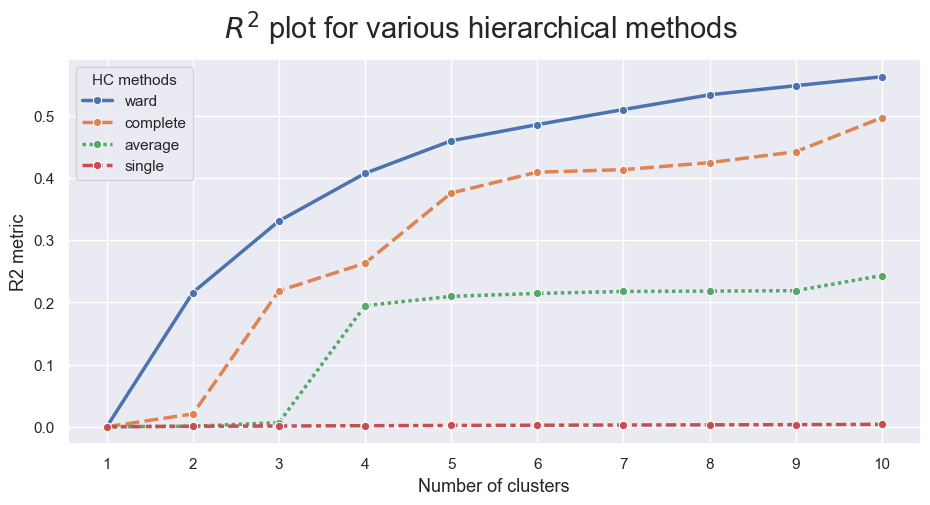

In [19]:
sns.set()

# Plot data
fig = plt.figure(figsize=(11,5))
sns.lineplot(data=r2_hc_methods, linewidth=2.5, markers=["o"]*4)

# Finalize the plot
plt.legend(title="HC methods", title_fontsize=11)
plt.xticks(range(1, max_nclus + 1))
plt.xlabel("Number of clusters", fontsize=13)
plt.ylabel("R2 metric", fontsize=13)

fig.suptitle("$R^2$ plot for various hierarchical methods", fontsize=21)

plt.show()

<div class="alert alert-block alert-warning" style="font-size:16px">

- Obviamente não dar clusters de $1$
- **ward** is better for $2$, $3$, ... clusters

<br>

- O elbow method não está óbvio $\rightarrow$ Entre $3$ e $4$ clusters

> Ela desenhou uma linha vertical para ver o que improve entre número de clusters (perpendicular ao ponto e até onde o outro ponto está verticalmente) 

</div>

### **Defining the number of clusters:**

Where is the **first big jump** on the Dendrogram?

In [20]:
# setting distance_threshold=0 and n_clusters=None ensures we compute the full tree
linkage = 'ward'
distance = 'euclidean'

hclust = AgglomerativeClustering(linkage=linkage, metric=distance, distance_threshold=0, n_clusters=None)
hclust.fit_predict(df[metric_features])

array([6069, 7663, 7833, ...,    4,    1,    0], dtype=int64)

In [21]:
# Adapted from:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py

# create the counts of samples under each node (number of points being merged)
counts = np.zeros(hclust.children_.shape[0])
n_samples = len(hclust.labels_)

# hclust.children_ contains the observation ids that are being merged together
# At the i-th iteration, children[i][0] and children[i][1] are merged to form node n_samples + i
for i, merge in enumerate(hclust.children_):
    # track the number of observations in the current cluster being formed
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            # If this is True, then we are merging an observation
            current_count += 1  # leaf node
        else:
            # Otherwise, we are merging a previously formed cluster
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

# the hclust.children_ is used to indicate the two points/clusters being merged (dendrogram's u-joins)
# the hclust.distances_ indicates the distance between the two points/clusters (height of the u-joins)
# the counts indicate the number of points being merged (dendrogram's x-axis)
linkage_matrix = np.column_stack(
    [hclust.children_, hclust.distances_, counts]
).astype(float)



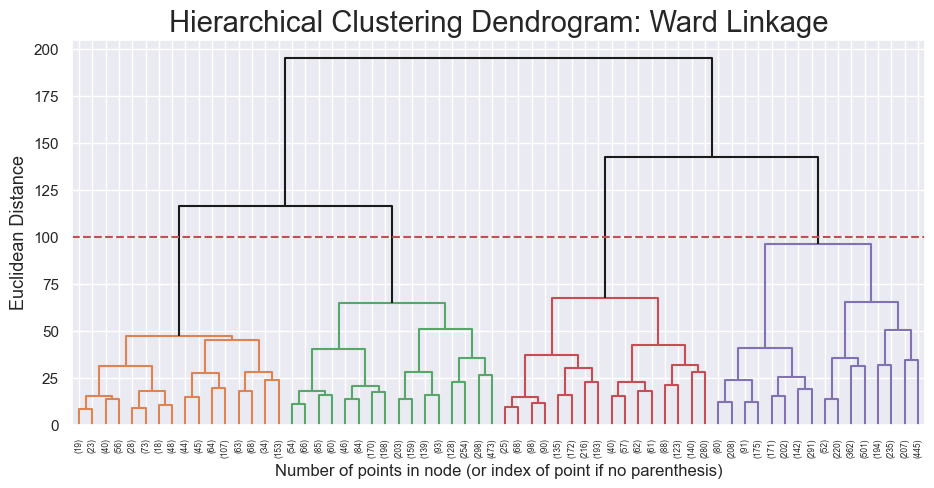

In [22]:
# Plot the corresponding dendrogram
sns.set()
fig = plt.figure(figsize=(11,5))
# The Dendrogram parameters need to be tuned
y_threshold = 100
dendrogram(linkage_matrix, truncate_mode='level', p=5, color_threshold=y_threshold, above_threshold_color='k')
plt.hlines(y_threshold, 0, 1000, colors="r", linestyles="dashed")
plt.title(f'Hierarchical Clustering Dendrogram: {linkage.title()} Linkage', fontsize=21)
plt.xlabel('Number of points in node (or index of point if no parenthesis)')
plt.ylabel(f'{distance.title()} Distance', fontsize=13)
plt.show()

<div class="alert alert-block alert-warning" style="font-size:16px">

- No dendograma conseguimos ver as distâncias entre clusters e ver se juntarmos por exemplo o <span style="color:red">vermelho</span> com o <span style="color:purple">**roxo**</span> não é boa ideia juntar $\rightarrow$ **distância muito grande** e para ser $3$ clusters pelo dendograma teriamos de juntar o <span style="color:orange">**laranja**</span> com o <span style="color:green">**verde**</span> $\rightarrow$ **Não é boa ideia**
- Ela chegou à conclusão que $5$ clusters é o melhor
  - Separa o <span style="color:purple">**roxo**</span> em $2$ clusters (Código a seguir com o $threshold = 75$)

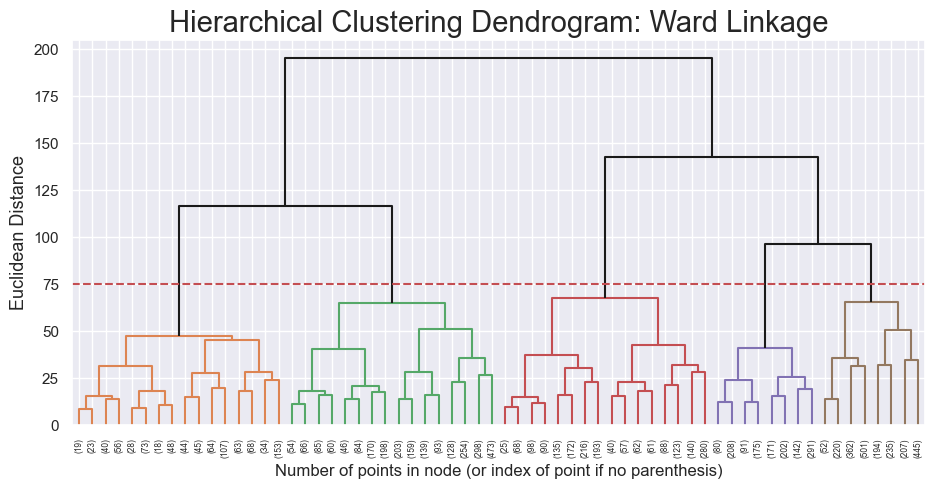

In [23]:
##########################################
# Visualize the Dendrogram with y_threshold = 75
##########################################
sns.set()
fig = plt.figure(figsize=(11,5))
# The Dendrogram parameters need to be tuned
y_threshold = 75
dendrogram(linkage_matrix, truncate_mode='level', p=5, color_threshold=y_threshold, above_threshold_color='k')
plt.hlines(y_threshold, 0, 1000, colors="r", linestyles="dashed")
plt.title(f'Hierarchical Clustering Dendrogram: {linkage.title()} Linkage', fontsize=21)
plt.xlabel('Number of points in node (or index of point if no parenthesis)')
plt.ylabel(f'{distance.title()} Distance', fontsize=13)
plt.show()

### **Test cluster solutions**

In [61]:
linkage = 'ward'
distance = 'euclidean'

In [62]:
# 4 cluster solution
n_clusters = 4

hc4_clust = AgglomerativeClustering(n_clusters=n_clusters)
hc4_labels = hc4_clust.fit_predict(df[metric_features])

In [63]:
# Characterizing the 4 clusters
df_concat = pd.concat([df[metric_features], 
                       pd.Series(hc4_labels, 
                                 name='labels', 
                                 index=df.index)], 
                    axis=1)

df_concat.groupby('labels').mean()

,income,frq,rcn,clothes,kitchen,small_appliances,toys,house_keeping,per_net_purchase,spent_online
labels,,,,,,,,,,
0,0.308045,0.263678,-0.056696,0.787469,-0.458885,-0.657823,-0.466644,-0.433142,0.044884,0.608672
1,-0.816389,-0.843022,0.084738,-0.190329,-0.130035,0.479371,-0.044491,-0.051491,0.645503,-0.753319
2,1.127360,1.054164,-0.086791,-0.565696,0.231780,0.639929,0.310619,0.148892,-1.352162,0.235598
3,-1.286292,-0.877714,0.170377,-1.464165,1.742958,-0.037862,1.366213,1.588910,0.813227,-0.816724


In [68]:
# 5 cluster solution
hc5_clust = AgglomerativeClustering(n_clusters=5)
hc5_labels = hc5_clust.fit_predict(df[metric_features])

In [69]:
# Characterizing the 5 clusters
df_concat = pd.concat([df[metric_features], 
                       pd.Series(hc5_labels, 
                                 name='labels', 
                                 index=df.index)], 
                    axis=1)

df_concat.groupby('labels').mean()

,income,frq,rcn,clothes,kitchen,small_appliances,toys,house_keeping,per_net_purchase,spent_online
labels,,,,,,,,,,
0,1.127360,1.054164,-0.086791,-0.565696,0.231780,0.639929,0.310619,0.148892,-1.352162,0.235598
1,-0.816389,-0.843022,0.084738,-0.190329,-0.130035,0.479371,-0.044491,-0.051491,0.645503,-0.753319
2,0.583921,0.696600,0.028464,0.512591,-0.310472,-0.414163,-0.309056,-0.288473,-0.184634,1.123735
3,-1.286292,-0.877714,0.170377,-1.464165,1.742958,-0.037862,1.366213,1.588910,0.813227,-0.816724
4,-0.141469,-0.441731,-0.195457,1.235357,-0.700710,-1.054846,-0.723419,-0.668869,0.418864,-0.230577


In [70]:
## See crosstab of 4 vs 5
## What does this mean?

pd.crosstab(
    pd.Series(hc5_labels, name='hc5_labels', index=df.index),
    pd.Series(hc4_labels, name='hc4_labels', index=df.index),
    )

hc4_labels,0,1,2,3
hc5_labels,,,,
0,0,0,1848,0
1,0,2510,0,0
2,2216,0,0,0
3,0,0,0,883
4,1360,0,0,0


<div class="alert alert-block alert-warning" style="font-size:16px">

> Ela só viu que se juntar o novo <span style="color:purple">**roxo**</span> com o <span style="color:brown">**castanho**</span> fica $2216 + 1360$
    
- **EXTRA** Até fica melhor com 5 no que diz respeito à distribuição de elementos

</div>

### **Final Hierarchical clustering solution**

In [76]:
# final cluster solution
linkage = 'ward'
distance = 'euclidean'
n_clusters = 5

hclust = AgglomerativeClustering(linkage=linkage, metric=distance, n_clusters=n_clusters)
hc_labels = hclust.fit_predict(df[metric_features])

In [77]:
# Characterizing the final clusters
df_concat = pd.concat([df[metric_features], 
                       pd.Series(hc_labels, name='labels', index=df.index)], axis=1)
df_concat.groupby('labels').mean()

,income,frq,rcn,clothes,kitchen,small_appliances,toys,house_keeping,per_net_purchase,spent_online
labels,,,,,,,,,,
0,1.127360,1.054164,-0.086791,-0.565696,0.231780,0.639929,0.310619,0.148892,-1.352162,0.235598
1,-0.816389,-0.843022,0.084738,-0.190329,-0.130035,0.479371,-0.044491,-0.051491,0.645503,-0.753319
2,0.583921,0.696600,0.028464,0.512591,-0.310472,-0.414163,-0.309056,-0.288473,-0.184634,1.123735
3,-1.286292,-0.877714,0.170377,-1.464165,1.742958,-0.037862,1.366213,1.588910,0.813227,-0.816724
4,-0.141469,-0.441731,-0.195457,1.235357,-0.700710,-1.054846,-0.723419,-0.668869,0.418864,-0.230577


#### Exercise: Visualize the cluster means as a heatmap

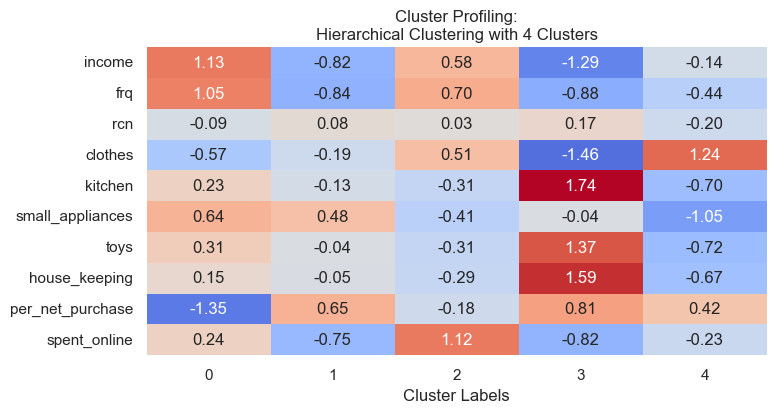

In [78]:
fig, ax = plt.subplots(figsize=(8,4))

hc_profile = df_concat.groupby('labels').mean().T

sns.heatmap(hc_profile,
            ax=ax,
            annot=True,
            fmt=".2f",
            cmap='coolwarm',
            center=0,
            cbar=False) # How can we improve this? -> add annot=True

ax.set_xlabel("Cluster Labels")
ax.set_title("Cluster Profiling:\nHierarchical Clustering with 4 Clusters")
plt.show()

<div class="alert alert-block alert-danger" style="font-size:16px">

> Ela no final fez com **$n_{clusters} = 5$** e fez um heatmap com as médias dos clusters

> **Uma cena importante** $\rightarrow$ **Como os dados estão com *StandardScaler* as médias são todas $0$, ou seja os valores apresentados são os valores relativos a $0$**

</div>

#### **Exercise:** Compare the cluster means to the population means. 

Visualize the cluster means with the population means in the same heatmap.

Explain these values for the population means.

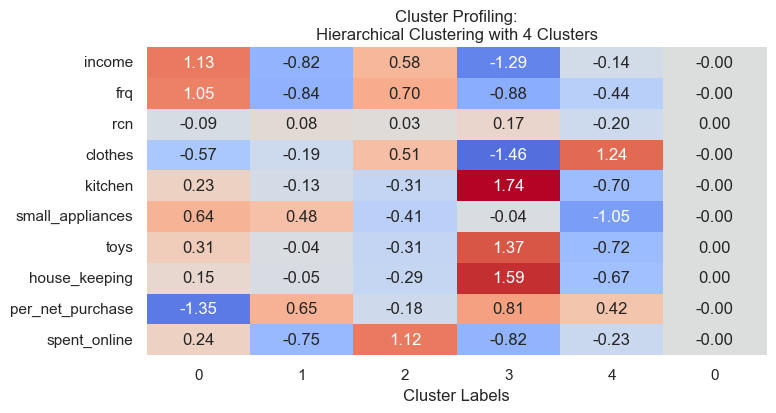

In [79]:
#### **Exercise:** Compare the cluster means to the population means. 
# Visualize the cluster means with the population means in the same heatmap.
# Explain these values for the population means.

# Population means
pop_means = df[metric_features].mean()

fig, ax = plt.subplots(figsize=(8,4))

hc_profile = df_concat.groupby('labels').mean().T

sns.heatmap(pd.concat([hc_profile, pop_means], axis=1),
            ax=ax,
            annot=True,
            fmt=".2f",
            cmap='coolwarm',
            center=0,
            cbar=False)

ax.set_xlabel("Cluster Labels")
ax.set_title("Cluster Profiling:\nHierarchical Clustering with 4 Clusters")
plt.show()

#### **Exercise:** Visualize the cluster means with the cluster sizes

Create a subplot with 1 row and 2 columns.

In the left subplot, visualize the heatmap of cluster means, and in the right subplot visualize the cluster sizes.

*Hint:* Use `sns.countplot()`.

https://seaborn.pydata.org/generated/seaborn.countplot.html


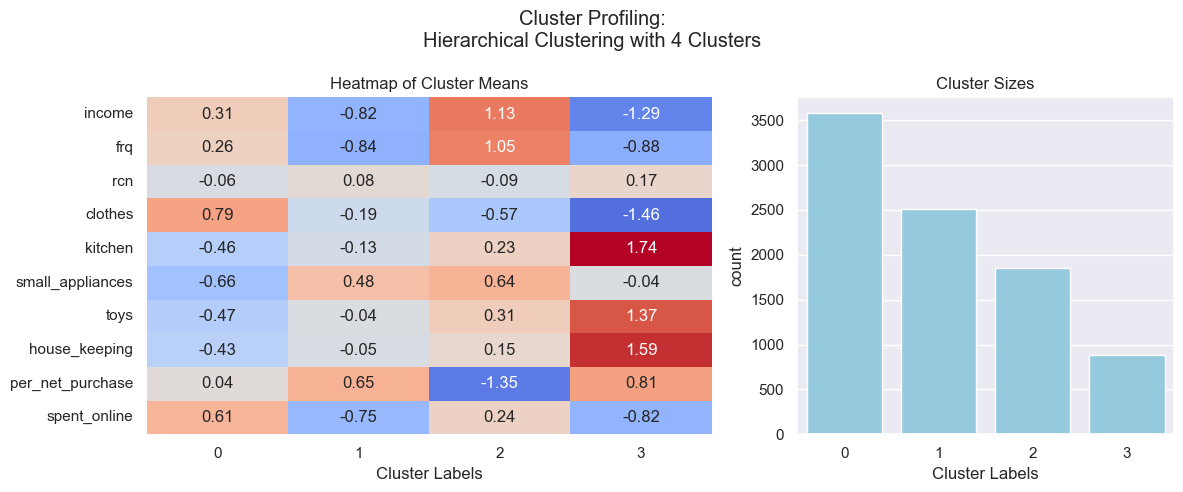

In [75]:
# In the left subplot, visualize the heatmap of cluster means, and in the right subplot visualize the cluster sizes.
label_counts = pd.Series(hc_labels).value_counts().sort_index()

fig, axes = plt.subplots(1,2, figsize=(12,5), width_ratios=[.6,.4], tight_layout=True)

# Cluster means heatmap
sns.heatmap(hc_profile,
            ax=axes[0],
            annot=True,
            fmt=".2f",
            cmap='coolwarm',
            center=0,
            cbar=False)

axes[0].set_xlabel("Cluster Labels")
axes[0].set_title("Heatmap of Cluster Means")

# Cluster sizes barplot
sns.countplot(x=hc_labels, color='skyblue', ax=axes[1])
axes[1].set_title("Cluster Sizes")
axes[1].set_xlabel("Cluster Labels")

fig.suptitle("Cluster Profiling:\nHierarchical Clustering with 4 Clusters")
plt.show()

#### **Exercise:**

The figure below shows the dendrogram produced by using the single linkage method to cluster the datapoints given. Identify the letter in the dendrogram corresponding to each point in the scatter plot:

*Example:* Point 10 = Letter L

![HC Exercise](./../figures/clustering/hc_exer_01.png)

<div class="alert alert-block alert-danger" style="font-size:16px">

- **A** & **B** $\rightarrow$ $6$ e $0$
- **C** $\rightarrow$ $1$
- **D** & **E** $\rightarrow$ $7$ e $2$
- **F** $\rightarrow$ $5$
- **G** $\rightarrow$ $3$
- **H** $\rightarrow$ $4$

</div>

### **More references on cluster evaluation:**


Halkidi, M., Batistakis, Y., & Vazirgiannis, M. (2002). Clustering validity checking methods. *ACM SIGMOD Record*, 31(3), 19–27. https://doi.org/10.1145/601858.601862

Liu, Y., Li, Z., Xiong, H., Gao, X. & Wu, J. (2010), Understanding of Internal Clustering Validation Measures, *2010 IEEE International Conference on Data Mining*, Sydney, NSW, Australia, 2010, pp. 911-916, https://10.1109/ICDM.2010.35. 


Pandove, D., Goel, S., & Rani, R. (2018). Systematic Review of Clustering High-Dimensional and Large Datasets. *ACM Transactions on Knowledge Discovery From Data*, 12(2), 1–68. https://doi.org/10.1145/3132088


Todeschini, R., Ballabio, D., Termopoli, V., & Consonni, V. (2024). Extended multivariate comparison of 68 cluster validity indices. A review. *Chemometrics and Intelligent Laboratory Systems*, 251, 105117. https://doi.org/10.1016/j.chemolab.2024.105117



## **Questions?**

## Next Session: **K-Means Clustering**

---